In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
data = pd.read_csv('income_evaluation.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [3]:
data.shape

(32561, 15)

In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
 workclass         32561 non-null object
 fnlwgt            32561 non-null int64
 education         32561 non-null object
 education-num     32561 non-null int64
 marital-status    32561 non-null object
 occupation        32561 non-null object
 relationship      32561 non-null object
 race              32561 non-null object
 sex               32561 non-null object
 capital-gain      32561 non-null int64
 capital-loss      32561 non-null int64
 hours-per-week    32561 non-null int64
 native-country    32561 non-null object
 income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

**No null data , that makes work a bit easier !!!**

In [7]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**If we understand the data, income needs to be changed from object to integer. After which further tools can be used to understand the behavior of this data. Later can be used to classify the data under cateogorial data of 0's and 1's. The target column can be income and rest can be the features for the moment. Let's analyze the correlation among the features and check which is important enough to effect data. ** 

(6.0, 0.0)

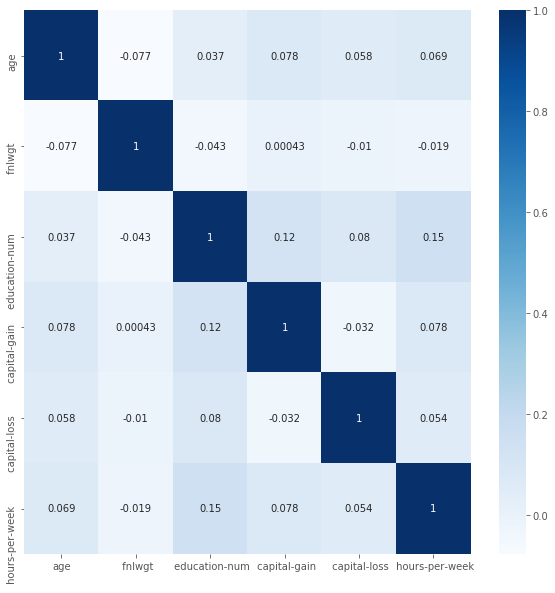

In [8]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), cmap='Blues', annot = True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The values obtained do not have a strong relation among themselves. education num and hours per week. 

In [9]:
data[' income'] = data[' income'].str.replace('K','')

In [10]:
data[' income']= data[' income'].str.replace('<=50', '0')
data[' income']= data[' income'].str.replace('>50', '1' )

In [11]:
data[' income'].value_counts()

 0    24720
 1     7841
Name:  income, dtype: int64

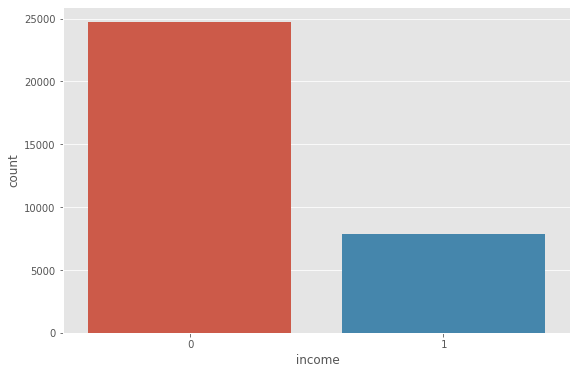

In [12]:
plt.figure(figsize = (20, 6)) 
plt.subplot(1,2,1)            
chart=sns.countplot(data = data ,x=' income')


Let's use the countplots in order to understand the cateogorial classification of data. 

[Text(0, 0, ' Bachelors'),
 Text(0, 0, ' HS-grad'),
 Text(0, 0, ' 11th'),
 Text(0, 0, ' Masters'),
 Text(0, 0, ' 9th'),
 Text(0, 0, ' Some-college'),
 Text(0, 0, ' Assoc-acdm'),
 Text(0, 0, ' Assoc-voc'),
 Text(0, 0, ' 7th-8th'),
 Text(0, 0, ' Doctorate'),
 Text(0, 0, ' Prof-school'),
 Text(0, 0, ' 5th-6th'),
 Text(0, 0, ' 10th'),
 Text(0, 0, ' 1st-4th'),
 Text(0, 0, ' Preschool'),
 Text(0, 0, ' 12th')]

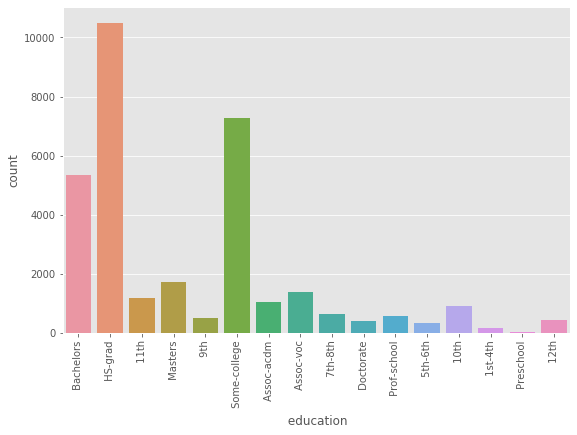

In [13]:
plt.figure(figsize = (20, 6)) 
plt.subplot(1,2,1)            
chart=sns.countplot(data = data ,x=' education')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

[Text(0, 0, ' Bachelors'),
 Text(0, 0, ' HS-grad'),
 Text(0, 0, ' 11th'),
 Text(0, 0, ' Masters'),
 Text(0, 0, ' 9th'),
 Text(0, 0, ' Some-college'),
 Text(0, 0, ' Assoc-acdm'),
 Text(0, 0, ' Assoc-voc'),
 Text(0, 0, ' 7th-8th'),
 Text(0, 0, ' Doctorate'),
 Text(0, 0, ' Prof-school'),
 Text(0, 0, ' 5th-6th'),
 Text(0, 0, ' 10th'),
 Text(0, 0, ' 1st-4th'),
 Text(0, 0, ' Preschool'),
 Text(0, 0, ' 12th')]

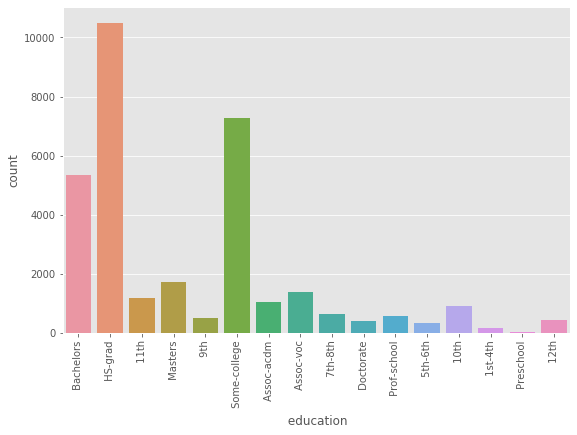

In [14]:
plt.figure(figsize = (20, 6)) 
plt.subplot(1,2,1)            
chart=sns.countplot(data = data ,x=' education')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

[Text(0, 0, ' Male'), Text(0, 0, ' Female')]

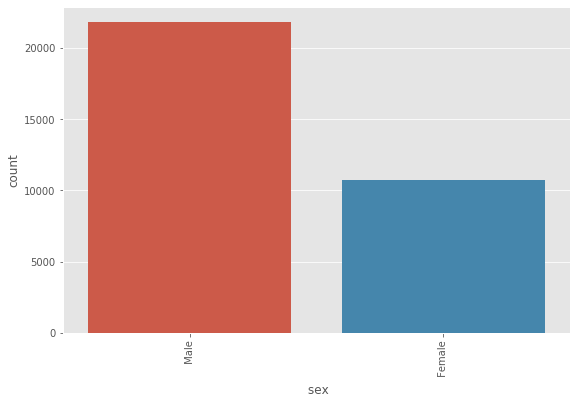

In [15]:
plt.figure(figsize = (20, 6)) 
plt.subplot(1,2,1)            
chart=sns.countplot(data = data ,x=' sex')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

[Text(0, 0, ' Not-in-family'),
 Text(0, 0, ' Husband'),
 Text(0, 0, ' Wife'),
 Text(0, 0, ' Own-child'),
 Text(0, 0, ' Unmarried'),
 Text(0, 0, ' Other-relative')]

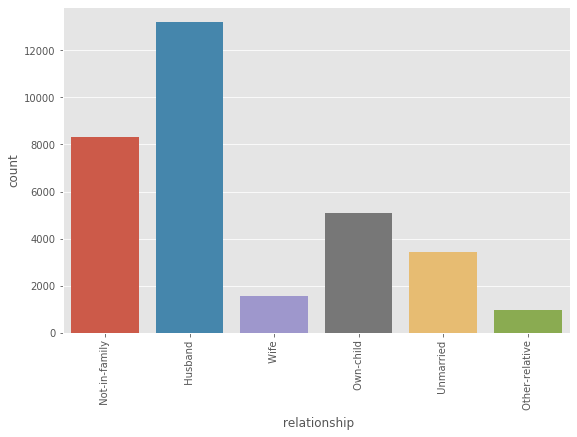

In [16]:
plt.figure(figsize = (20, 6)) 
plt.subplot(1,2,1)            
chart=sns.countplot(data = data ,x=' relationship')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

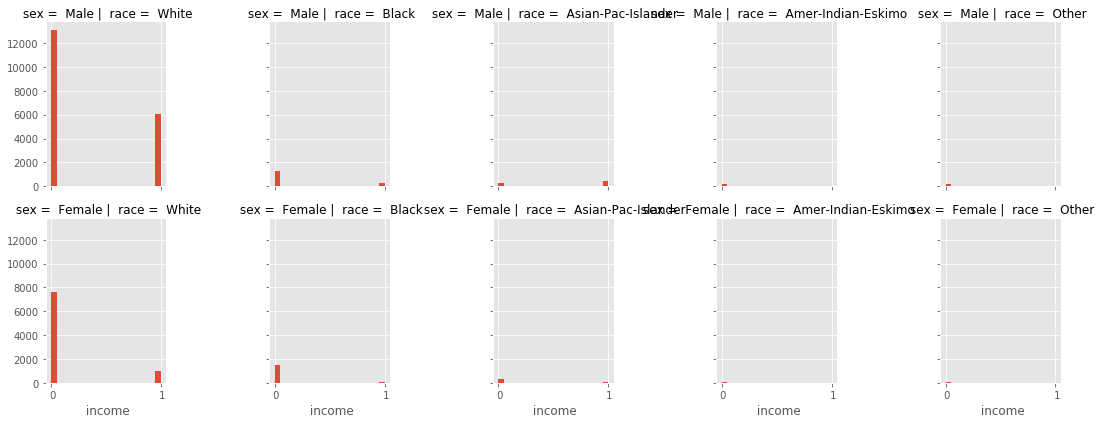

In [17]:
g=sns.FacetGrid(data, col = ' race', row= ' sex')
# g = g.map(sns.distplot, ' income', color = 'r')
g.map(plt.hist, ' income', bins=20)

Facet grid plots are amazing for visulization as two 2-3 data can be simuntaneously visualised. For example column talks about race, so it will plot all cateogorial data in race under n cateogories. Second cateogory is in row, which explains about the second feature. Here as we compare both white male and female has higher income compared to other race. 

In [18]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x = data[[ 'age', ' education-num',' capital-loss', ' capital-gain']]
y = data[' income']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 4)
x,y = data.loc[:,data.columns != ' income'], data.loc[:,' income']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

Prediction: [' 0' ' 0' ' 1' ... ' 0' ' 0' ' 0']
With KNN (K=3) accuracy is:  0.8275156106049749


Accuracy obtained with model is 79 % . For the features column we have selected (age, education-num, capital-loss, capital-gain) and rest income is for target!! 
We have divided data into 30 % ratio of traning and testing !!! Nieghbours are 4 as a not too high and not too low are expected. 
K should be wisely chosen ? Why K are the nearest nieghbours. If value of K is very large , both the test and train data will be underfitted , implies high bias and high variance!! And if the data is overfitted it implies low bias and high variance !! (k value small) means the traning data is a good fit but testing data is poorly fit.  

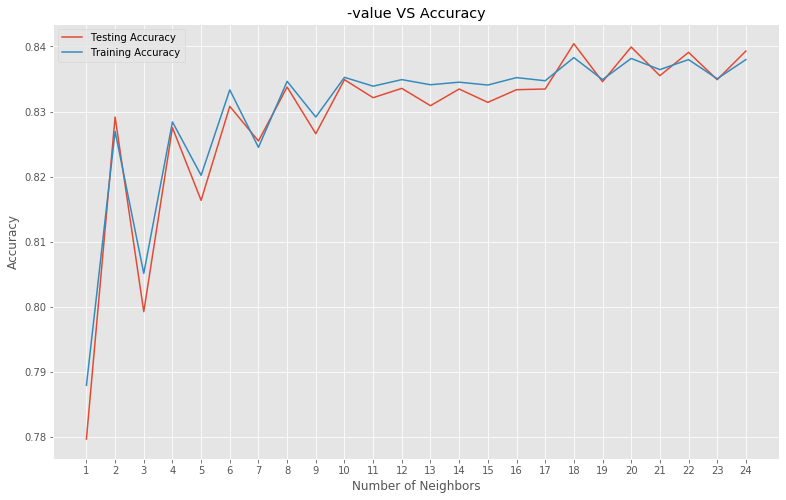

Best accuracy is 0.8404135530760569 with K = 18


In [19]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Again if we understand the model of KNN, the best accuracy is obtained at 84% with K= 18